In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [48]:
file_path = "/Users/seong-yeseul/Downloads/2012"
names = os.listdir(file_path)
names
p = re.compile("^[0-9]{4}")
final = pd.read_excel(file_path + "/" + names[0])
for n in names[1:]:
    if p.match(n) != None and n.split(".")[1] == "xlsx":
        df = pd.read_excel(file_path + "/" + n)[final.columns]
    elif p.match(n) != None and n.split(".")[1] == "csv":
        try:
            df = pd.read_csv(file_path + "/" + n, encoding = "cp949")[final.columns]
        except:
            df = pd.read_csv(file_path + "/" + n, encoding = "utf-8")[final.columns]
    else:
        pass
    final = pd.concat([final, df], axis = 0)


In [52]:
final

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,주소
0,서울,중구,111121,2012100101,0.004,0.5,0.002,0.036,18.0,서울 중구 서소문동
1,서울,중구,111121,2012100102,0.004,0.6,0.002,0.034,16.0,서울 중구 서소문동
2,서울,중구,111121,2012100103,0.004,0.6,0.002,0.032,15.0,서울 중구 서소문동
3,서울,중구,111121,2012100104,0.004,0.6,0.002,0.030,19.0,서울 중구 서소문동
4,서울,중구,111121,2012100105,0.004,0.5,0.002,0.026,17.0,서울 중구 서소문동
...,...,...,...,...,...,...,...,...,...,...
699931,충북 충주시,칠금동,633123,2015093020,0.003,0.1,0.020,0.024,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37)
699932,충북 충주시,칠금동,633123,2015093021,0.003,0.2,0.005,0.035,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37)
699933,충북 충주시,칠금동,633123,2015093022,0.003,0.2,0.006,0.029,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37)
699934,충북 충주시,칠금동,633123,2015093023,0.003,0.2,0.008,0.023,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37)


In [56]:
final.columns = ["area", "stn", "stn_code", "tm", "so2", "co", "o3", "no2", "pm10", "add"]

In [62]:
final.to_csv("pm10.csv", encoding = "utf-8-sig", index = False)

In [64]:
final["yyyymmdd"] = [int(str(x)[:-2]) for x in final["tm"]]

In [68]:
back = pd.read_csv("back_hospital.csv", encoding = "utf-8-sig").drop("Unnamed: 0", axis = 1)
back.columns = [x.split(".")[1] for x in back.columns]
back

,yyyymmdd,area,sex,frequency
0,20120101,강원,1,3
1,20120101,강원,2,3
2,20120101,경기,1,4
3,20120101,경기,2,5
4,20120101,경남,1,2
...,...,...,...,...
49669,20151231,제주,2,0
49670,20151231,충남,1,0
49671,20151231,충남,2,0
49672,20151231,충북,1,1


In [69]:
#for window users
back.to_csv("back_hospital.csv", encoding = "cp949", index = False)

In [72]:
back.to_csv("back_hospital.csv", encoding = "utf-8-sig", index = False)

In [73]:
pd.read_csv("back_hospital.csv")

,yyyymmdd,area,sex,frequency
0,20120101,강원,1,3
1,20120101,강원,2,3
2,20120101,경기,1,4
3,20120101,경기,2,5
4,20120101,경남,1,2
...,...,...,...,...
49669,20151231,제주,2,0
49670,20151231,충남,1,0
49671,20151231,충남,2,0
49672,20151231,충북,1,1


In [74]:
back.area.value_counts()

강원    2922
세종    2922
충남    2922
제주    2922
전북    2922
전남    2922
인천    2922
울산    2922
서울    2922
경기    2922
부산    2922
대전    2922
대구    2922
광주    2922
경북    2922
경남    2922
충북    2922
Name: area, dtype: int64

In [96]:
#미세먼지 데이터 중단위 분류로 바꿔주기~~(17개 시도)
np.unique([x.split(" ")[0] for x in final["area"]])

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype='<U2')

In [97]:
final["area_17"] = [x.split(" ")[0] for x in final["area"]]
final

,area,stn,stn_code,tm,so2,co,o3,no2,pm10,add,yyyymmdd,area_17
0,서울,중구,111121,2012100101,0.004,0.5,0.002,0.036,18.0,서울 중구 서소문동,20121001,서울
1,서울,중구,111121,2012100102,0.004,0.6,0.002,0.034,16.0,서울 중구 서소문동,20121001,서울
2,서울,중구,111121,2012100103,0.004,0.6,0.002,0.032,15.0,서울 중구 서소문동,20121001,서울
3,서울,중구,111121,2012100104,0.004,0.6,0.002,0.030,19.0,서울 중구 서소문동,20121001,서울
4,서울,중구,111121,2012100105,0.004,0.5,0.002,0.026,17.0,서울 중구 서소문동,20121001,서울
...,...,...,...,...,...,...,...,...,...,...,...,...
699931,충북 충주시,칠금동,633123,2015093020,0.003,0.1,0.020,0.024,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),20150930,충북
699932,충북 충주시,칠금동,633123,2015093021,0.003,0.2,0.005,0.035,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),20150930,충북
699933,충북 충주시,칠금동,633123,2015093022,0.003,0.2,0.006,0.029,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),20150930,충북
699934,충북 충주시,칠금동,633123,2015093023,0.003,0.2,0.008,0.023,NaN,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),20150930,충북


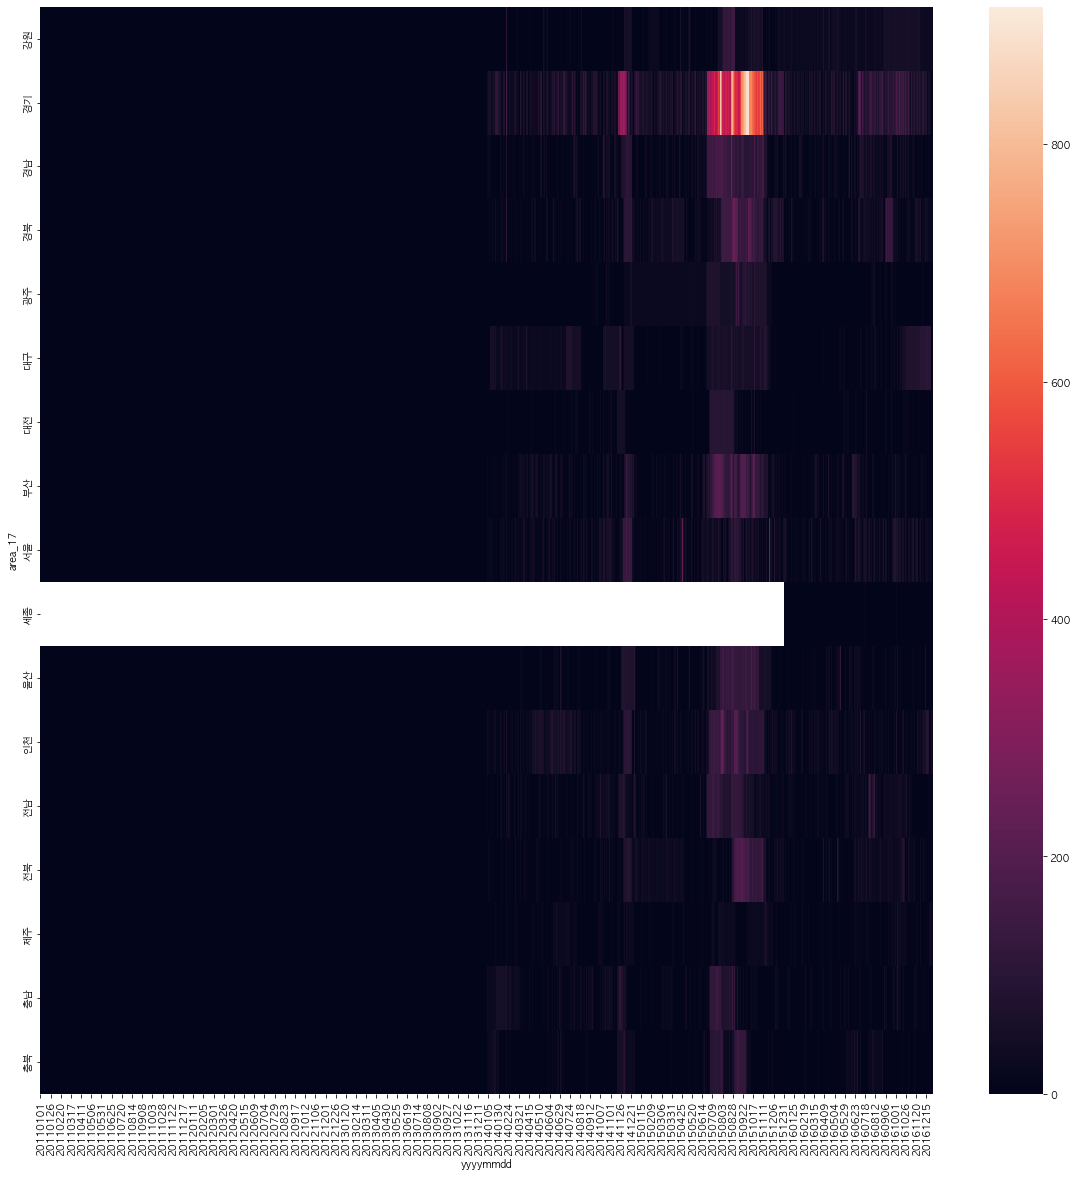

In [117]:
nullstat = final.pivot_table(index = "area_17", columns = "yyyymmdd", values = "pm10", aggfunc = lambda x: x.isnull().sum())
def show_han(): #plt에서 한글 깨질 때
    import os
    if os.name == "posix": #운영체제 맥
        plt.rc("font", family = "AppleGothic")
    elif os.name == "nt": #운영체제 윈도우
        plt.rc("font", family = "Malgun Gothic")
    plt.rc("axes", unicode_minus = False) #공통 : 마이너스 폰트 설정
show_han()
plt.figure(figsize = (20, 20))
sns.heatmap(nullstat)
plt.show()

In [141]:
final.to_csv("pm10.csv", encoding = "utf-8-sig", index = False)

/Users/seong-yeseul/miniforge3/envs/atf24/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pm10', ylabel='Density'>

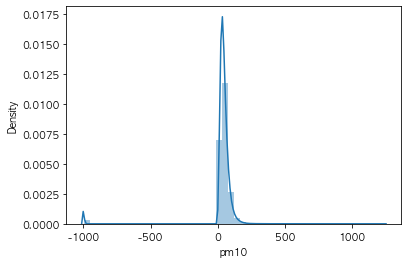

In [127]:
sns.distplot(final["pm10"])

In [129]:
final.isnull().sum()

area             0
stn              0
stn_code         0
tm               0
so2         378309
co          389769
o3          378255
no2         296793
pm10        554880
add              0
yyyymmdd         0
area_17          0
dtype: int64

In [131]:
print((final[["so2", "co", "o3", "no2", "pm10"]] == -999).sum())#결측값들!
for col in ["so2", "co", "o3", "no2", "pm10"]:
    final.loc[final[col] == -999, col] = np.nan
final.isnull().sum() #개판났구요,,,,^_____^

so2     351795
co      376152
o3      328456
no2     256463
pm10    249946
dtype: int64


area             0
stn              0
stn_code         0
tm               0
so2         730104
co          765921
o3          706711
no2         553256
pm10        804826
add              0
yyyymmdd         0
area_17          0
dtype: int64

In [132]:
final.isnull().mean() #거의 50%가 결측인데 이거 괜찮은지?;; 일단 못먹어도 고

area        0.000000
stn         0.000000
stn_code    0.000000
tm          0.000000
so2         0.044316
co          0.046490
o3          0.042896
no2         0.033581
pm10        0.048851
add         0.000000
yyyymmdd    0.000000
area_17     0.000000
dtype: float64

29


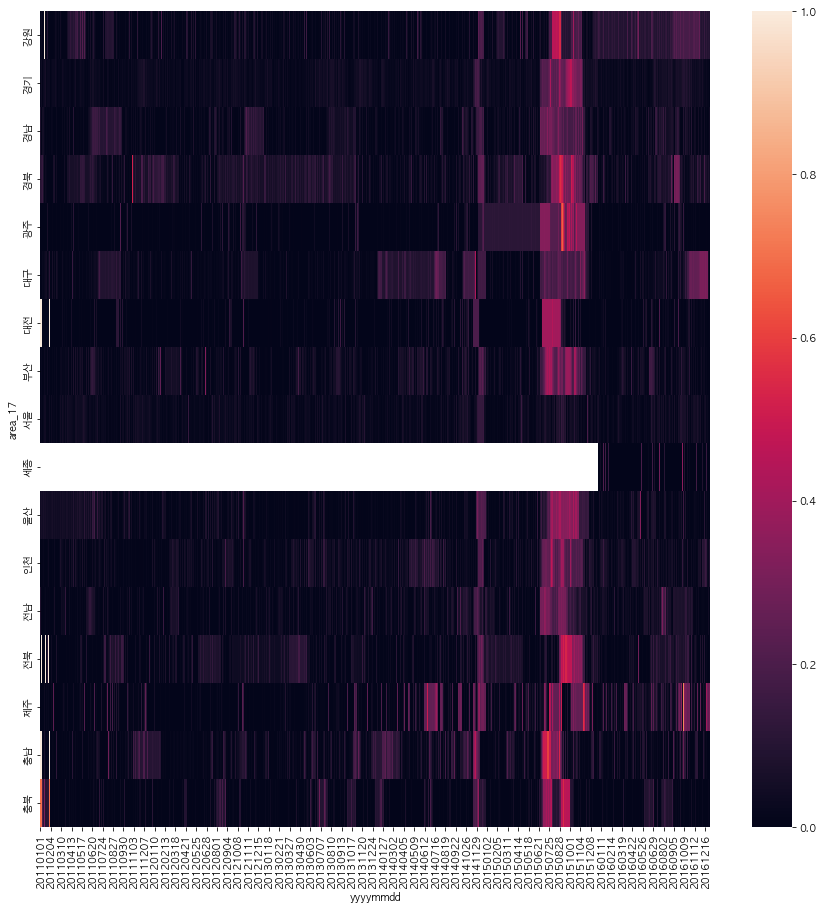

In [138]:
nullstat1 = final.pivot_table(index = "area_17", columns = "yyyymmdd", values = "pm10", aggfunc = lambda x: x.isnull().mean())
print((nullstat1 == 1).sum().sum()) #전 기간 전 지역에서 아예 통으로 비는 칸이 아예 29개(이중 세종만 있으면 다행일 지경;
plt.figure(figsize = (15, 15))
sns.heatmap(nullstat1)
plt.show()

In [136]:
pm10_agg = final.groupby(["area_17", "yyyymmdd"])[["so2", "co", "o3", "no2", "pm10"]].agg(np.nanmean).reset_index()
display(pm10_agg)
print(pm10_agg[pm10_agg["area_17"] == "세종"])

,area_17,yyyymmdd,so2,co,o3,no2,pm10
0,강원,20110101,0.005166,0.759091,0.021689,0.017213,41.049242
1,강원,20110102,0.004791,0.851894,0.019595,0.020078,39.227273
2,강원,20110103,0.004629,0.945076,0.018277,0.024282,43.992424
3,강원,20110104,0.004570,0.875676,0.018027,0.025592,50.586873
4,강원,20110105,0.005268,0.595720,0.026514,0.017430,46.420233
...,...,...,...,...,...,...,...
35433,충북,20161227,0.003186,0.504643,0.015589,0.019990,37.452297
35434,충북,20161228,0.004027,0.592883,0.007324,0.028854,45.156584
35435,충북,20161229,0.003783,0.535764,0.012149,0.023849,37.128920
35436,충북,20161230,0.003835,0.654514,0.008958,0.026286,37.454545


      area_17  yyyymmdd       so2        co        o3       no2       pm10
19728      세종  20160101  0.003375  1.112500  0.014333  0.027333  62.229167
19729      세종  20160102  0.003938  0.977083  0.017646  0.031958  52.291667
19730      세종  20160103  0.003417  1.047917  0.016729  0.027000  67.333333
19731      세종  20160104  0.006187  0.914583  0.029500  0.024521  71.562500
19732      세종  20160105  0.005188  0.689583  0.018375  0.027833  33.291667
...       ...       ...       ...       ...       ...       ...        ...
20089      세종  20161227  0.005604  0.552083  0.025125  0.013750  34.291667
20090      세종  20161228  0.005813  0.658333  0.010896  0.030813  43.916667
20091      세종  20161229  0.005521  0.631250  0.015646  0.022708  35.875000
20092      세종  20161230  0.005333  0.754167  0.008500  0.031625  40.625000
20093      세종  20161231  0.005521  0.952083  0.004125  0.036375  49.062500

[366 rows x 7 columns]


In [139]:
pm10_agg.to_csv("pm10_agg_mac.csv", encoding = "utf-8-sig", index = False)
pm10_agg.to_csv("pm10_agg_win.csv", encoding = "cp949", index = False)

In [149]:
pm10_agg.rename(columns = {"area_17" : "area"}, inplace = True)
pm10_agg

,area,yyyymmdd,so2,co,o3,no2,pm10
0,강원,20110101,0.005166,0.759091,0.021689,0.017213,41.049242
1,강원,20110102,0.004791,0.851894,0.019595,0.020078,39.227273
2,강원,20110103,0.004629,0.945076,0.018277,0.024282,43.992424
3,강원,20110104,0.004570,0.875676,0.018027,0.025592,50.586873
4,강원,20110105,0.005268,0.595720,0.026514,0.017430,46.420233
...,...,...,...,...,...,...,...
35433,충북,20161227,0.003186,0.504643,0.015589,0.019990,37.452297
35434,충북,20161228,0.004027,0.592883,0.007324,0.028854,45.156584
35435,충북,20161229,0.003783,0.535764,0.012149,0.023849,37.128920
35436,충북,20161230,0.003835,0.654514,0.008958,0.026286,37.454545


In [156]:
dd = pd.read_csv("/Users/seong-yeseul/Downloads/2-2_검증데이터셋.csv", encoding = "cp949")
dd["yyyymmdd"] = [int(x.replace("-", "")) for x in dd["yyyymmdd"]]
dd

,yyyymmdd,area,sex,frequency
0,20160101,경기,1,NaN
1,20160102,경기,1,NaN
2,20160103,경기,1,NaN
3,20160104,경기,1,NaN
4,20160105,경기,1,NaN
...,...,...,...,...
12405,20161227,제주,2,NaN
12406,20161228,제주,2,NaN
12407,20161229,제주,2,NaN
12408,20161230,제주,2,NaN


In [159]:
#백병원데이터 + 검증데이터와 pm10(미세먼지) 테이블 합병
pm10_agg = pd.merge(pd.concat([back, dd], axis = 0), pm10_agg, on = ["area", "yyyymmdd"], how = "left")
pm10_agg.to_csv("back_pm10.csv", encoding = "utf-8-sig", index = False)